In [122]:
%matplotlib inline

In [182]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from scipy.ndimage import convolve

from collections import Counter
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import *

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [124]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\7h3ph\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Working with Images and Text
## Live

In [125]:
tiger_image = imread("./data/tiger.jpg")

In [126]:
# height x width x channels (in this case red, green, blue in order, i.e. channel 0 = red)
tiger_image.shape

(600, 580, 3)

In [127]:
tiger_image.dtype

dtype('uint8')

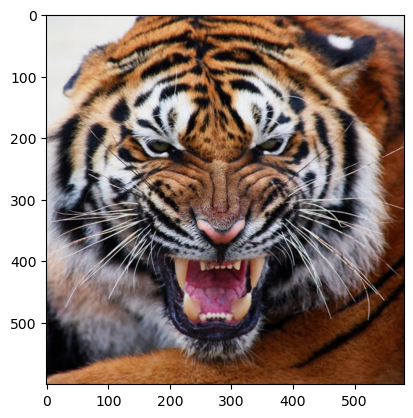

In [128]:
plt.imshow(tiger_image)

In [129]:
r, g, b = tiger_image[:, :, 0], tiger_image[:, :, 1], tiger_image[:, :, 2]

In [130]:
r.shape

(600, 580)

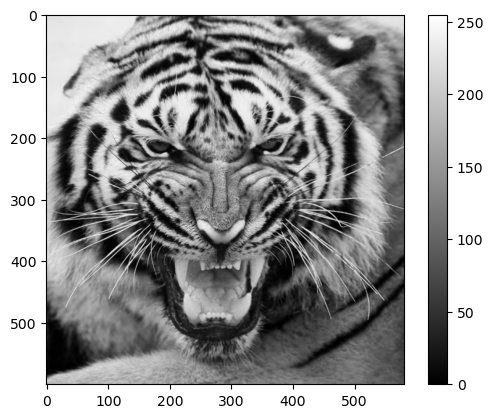

In [131]:
plt.imshow(r, cmap="gray")
plt.colorbar()

(0.0, 255.0)

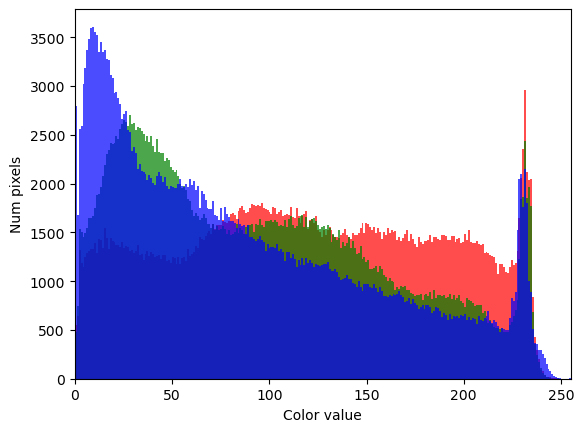

In [132]:
plt.hist(r.ravel(), bins = 256, color='r', alpha = 0.7)
plt.hist(g.ravel(), bins = 256, color='g', alpha = 0.7)
plt.hist(b.ravel(), bins = 256, color='b', alpha = 0.7)

plt.xlabel("Color value")
plt.ylabel("Num pixels")

plt.xlim(0, 255)

In [133]:
# human color perception constants
tiger_grayscale = 0.299 * r + 0.587 * g + 0.114 * b

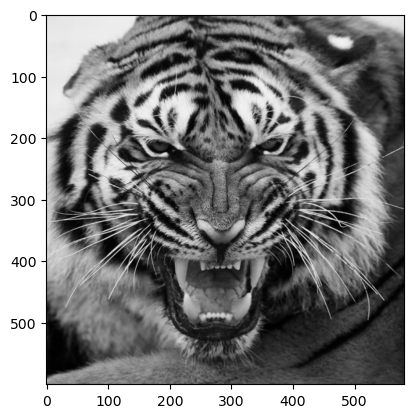

In [134]:
plt.imshow(tiger_grayscale, cmap="gray")

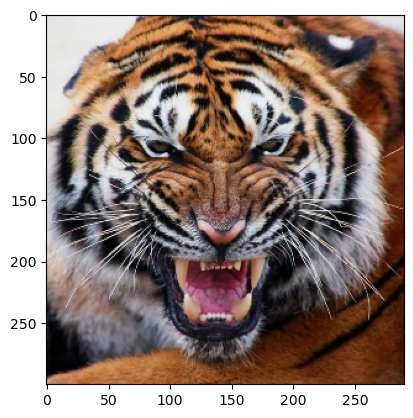

In [135]:
#downsampling
plt.imshow(tiger_image[::2, ::2, :], cmap="gray")

In [136]:
tiger_sample = tiger_grayscale[100:110, 100:110].astype(int)
tiger_sample

array([[159, 154, 151, 144, 126, 108, 105, 106, 118, 113],
       [158, 144, 136, 132, 118, 104,  92,  82,  90,  91],
       [155, 137, 124, 123, 111, 103,  90,  77,  77,  80],
       [149, 132, 116, 107, 111, 114, 103,  88,  81,  74],
       [138, 121, 105, 103, 115, 119, 118, 103,  83,  67],
       [133, 116, 104, 107, 113, 115, 109,  92,  73,  61],
       [131, 117, 108, 111, 112, 104,  90,  77,  71,  65],
       [119, 105,  94,  94,  99, 101,  92,  77,  68,  60],
       [111, 103,  98,  95,  94, 104, 100,  80,  62,  56],
       [101, 100, 100,  97,  96,  93,  87,  72,  59,  58]])

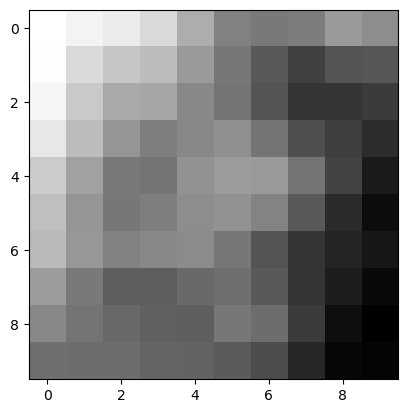

In [137]:
plt.imshow(tiger_sample, cmap="gray")

In [138]:
# this would take a 3x3 section of the image above and do a sum of the products (0*159 + 1*154 + 0*151...)
# so the first 3x3 in this case becomes 147 (154 - 144 + 137)
# the number we get (147) we write in the center pixel, which is why the filter should be oddly numbered
# the we do the sliding window method, where the window is the filter
# since this is how we apply the convolution, we would lose the edge pixels(depending on filter size)! - this is valid convolution
# we can also use something called same convolution - we can add a padding to the image beforehand to combat the loss
conv_filter = np.array([
    [0, 1, 0],
    [0, -1, 0],
    [0, 1, 0]
])

In [139]:
conv_result = convolve(tiger_sample, conv_filter)

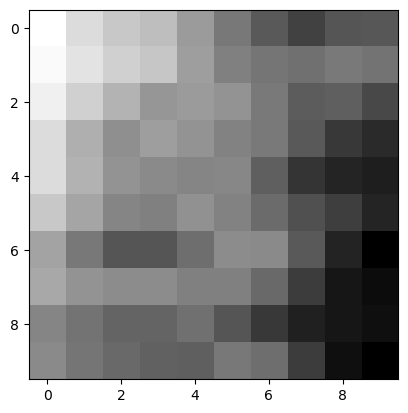

In [140]:
plt.imshow(conv_result, cmap="gray")

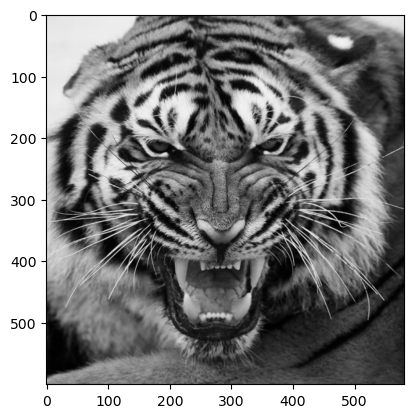

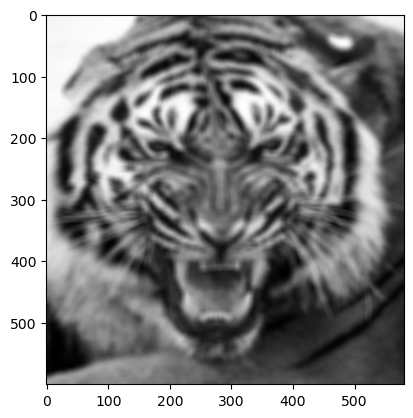

In [141]:
conv_filter = np.ones([11, 11]) / 121
plt.imshow(tiger_grayscale, cmap='gray')
plt.show()
plt.imshow(convolve(tiger_grayscale, conv_filter), cmap='gray')
plt.show()

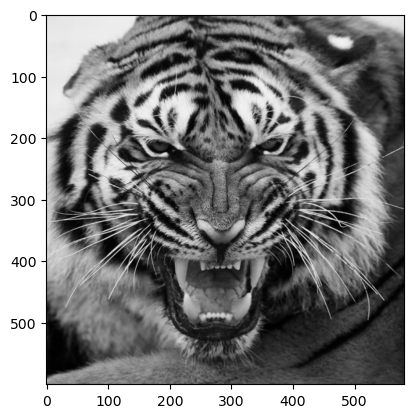

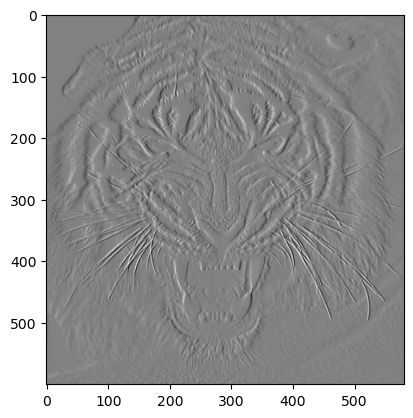

In [142]:
#sobel operator
conv_filter = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])
plt.imshow(tiger_grayscale, cmap='gray')
plt.show()
result = convolve(tiger_grayscale, conv_filter)
plt.imshow(result, cmap='gray', vmin=result.min(), vmax = result.max())
plt.show()

In [143]:
result.min()

-816.836

In [144]:
result.max()

793.179

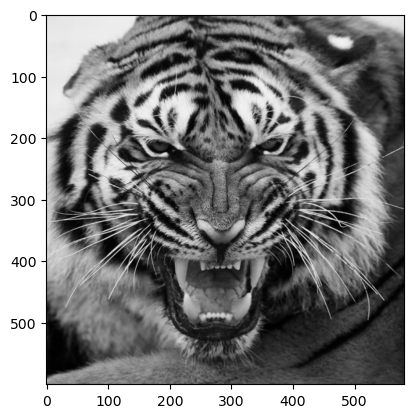

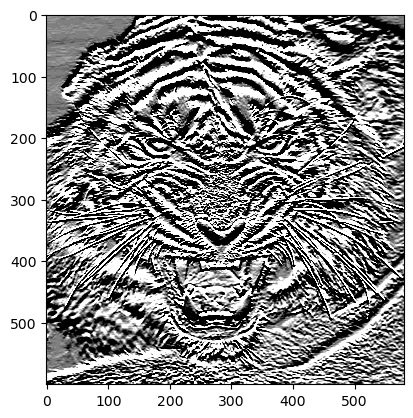

In [145]:
#sobel operator
conv_filter = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])
plt.imshow(tiger_grayscale, cmap='gray')
plt.show()
result = convolve(tiger_grayscale, conv_filter.T)
plt.imshow(result, cmap='gray', vmin=-20, vmax = 20)
plt.show()

In [146]:
thresholded = tiger_grayscale.copy()
thresholded[thresholded < 100] = 0
thresholded[thresholded >= 100] = 255

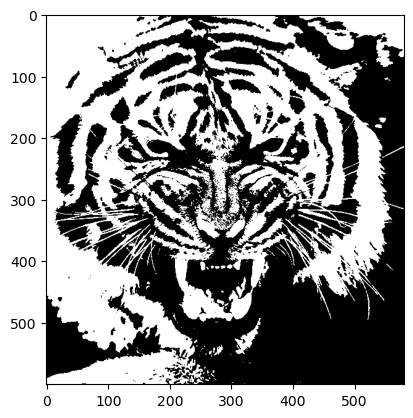

In [147]:
plt.imshow(thresholded, cmap='gray')

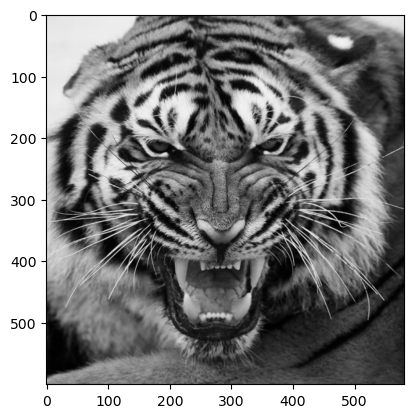

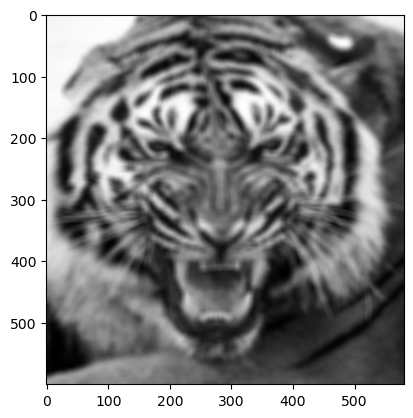

In [148]:
conv_filter = np.ones([11, 11]) / 121
plt.imshow(tiger_grayscale, cmap='gray')
plt.show()
blurred = convolve(tiger_grayscale, conv_filter)
plt.imshow(blurred, cmap='gray')
plt.show()

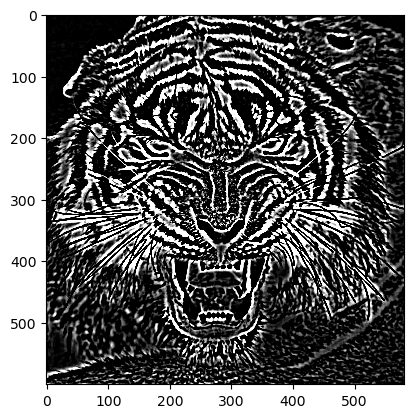

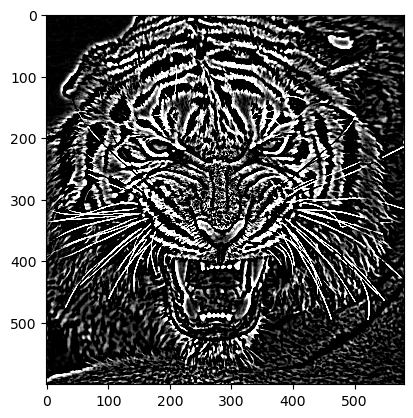

In [149]:
plt.imshow(blurred - tiger_grayscale, cmap='gray', vmin=0, vmax =20)
plt.show()
plt.imshow(tiger_grayscale - blurred, cmap='gray', vmin=0, vmax =20)
plt.show()

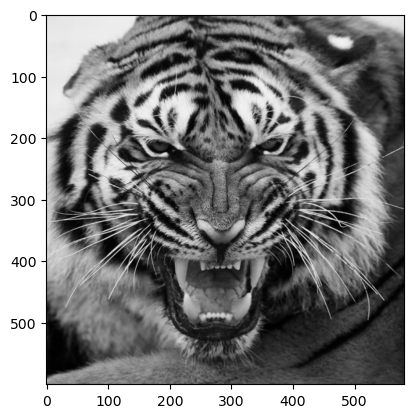

In [150]:

plt.imshow(tiger_grayscale / tiger_grayscale.mean(), cmap='gray')

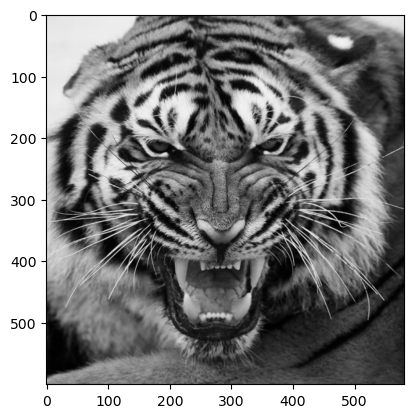

In [151]:
# standardization = mean of 0, std of 1
plt.imshow((tiger_grayscale - tiger_grayscale.mean()) / tiger_grayscale.std(ddof=1), cmap='gray')

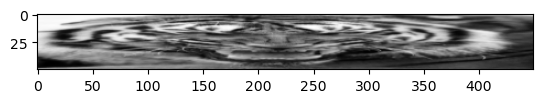

In [152]:
plt.imshow(resize(tiger_grayscale, (50, 450)), cmap="gray")

In [153]:
with open("./data/alice.txt", 'r') as f:
    text = f.read()

In [154]:
print(text)




Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Release Date: June 25, 2008 [EBook #11]
Last Updated: October 6, 2016

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***



Produced by Arthur DiBianca and David Widger

















ALICE’S ADVENTURES
IN WONDERLAND


By Lewis Carroll



THE MILLENNIUM FULCRUM EDITION 3.0





Contents
CHAPTER I. 	Down the Rabbit-Hole
CHAPTER II. 	The Pool of Tears
CHAPTER III. 	A Caucus-Race and a Long Tale
CHAPTER IV. 	The Rabbit Sends in a Little Bill
CHAPTER V. 	Advice from a Caterpillar
CHAPTER VI. 	Pig and Pepper
CHAPTER VII. 	A Mad 

In [155]:
character_counter = Counter(text)

In [156]:
characters = character_counter.most_common(20)
chars = [ch[0] for ch in characters]
counts = [ch[1] for ch in characters]

<BarContainer object of 20 artists>

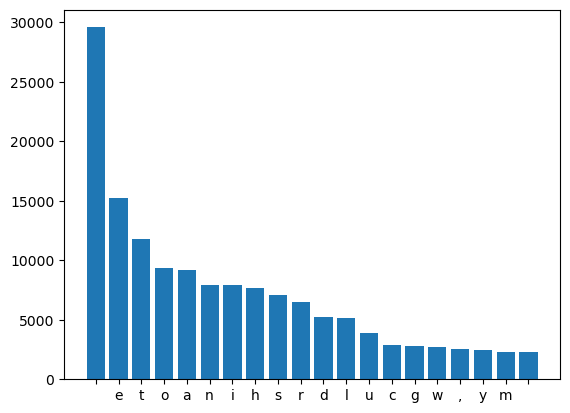

In [157]:
plt.bar(chars, counts)

In [158]:
words = re.split("\W+", text.lower())

In [159]:
word_counter = Counter(words)

In [160]:
word_counter.most_common(20)

[('the', 1825),
 ('and', 944),
 ('to', 809),
 ('a', 695),
 ('of', 632),
 ('it', 610),
 ('she', 553),
 ('i', 546),
 ('you', 481),
 ('said', 462),
 ('in', 432),
 ('alice', 404),
 ('was', 358),
 ('that', 330),
 ('as', 274),
 ('her', 248),
 ('with', 228),
 ('at', 227),
 ('s', 222),
 ('t', 218)]

In [161]:
word_counter["we"]

43

In [162]:
stop = set(stopwords.words('english'))

In [163]:
words = [w for w in words if w not in stop]
word_counter = Counter(words)

In [164]:
word_counter.most_common(20)

[('said', 462),
 ('alice', 404),
 ('little', 129),
 ('one', 106),
 ('gutenberg', 93),
 ('know', 88),
 ('project', 87),
 ('like', 85),
 ('would', 83),
 ('went', 83),
 ('could', 78),
 ('queen', 76),
 ('thought', 74),
 ('time', 71),
 ('see', 70),
 ('well', 63),
 ('king', 63),
 ('turtle', 60),
 ('way', 58),
 ('began', 58)]

In [166]:
stemmer = PorterStemmer()
words_for_stemming = ["caresses", "flies", "dies", "seizing", "itemization", "sensational", "traditional", "reference", "plotted"]
print([stemmer.stem(word) for word in words_for_stemming])

['caress', 'fli', 'die', 'seiz', 'item', 'sensat', 'tradit', 'refer', 'plot']


In [169]:
words = [stemmer.stem(word) for word in words]
word_counter = Counter(words)

In [170]:
word_counter.most_common(20)

[('said', 462),
 ('alic', 404),
 ('littl', 129),
 ('one', 107),
 ('look', 106),
 ('like', 97),
 ('gutenberg', 93),
 ('know', 92),
 ('project', 87),
 ('work', 86),
 ('would', 83),
 ('went', 83),
 ('thing', 82),
 ('thought', 80),
 ('could', 78),
 ('queen', 77),
 ('time', 77),
 ('go', 77),
 ('see', 71),
 ('say', 70)]

In [175]:
corpus = fetch_20newsgroups()["data"]

In [178]:
count_vectorirer = CountVectorizer()

In [179]:
count_vectorirer.fit(corpus)

CountVectorizer()

In [180]:
count_vectorirer.vocabulary_

{'from': 56979,
 'lerxst': 75358,
 'wam': 123162,
 'umd': 118280,
 'edu': 50527,
 'where': 124031,
 'my': 85354,
 'thing': 114688,
 'subject': 111322,
 'what': 123984,
 'car': 37780,
 'is': 68532,
 'this': 114731,
 'nntp': 87620,
 'posting': 95162,
 'host': 64095,
 'rac3': 98949,
 'organization': 90379,
 'university': 118983,
 'of': 89362,
 'maryland': 79666,
 'college': 40998,
 'park': 92081,
 'lines': 76032,
 '15': 4605,
 'was': 123292,
 'wondering': 124931,
 'if': 65798,
 'anyone': 28615,
 'out': 90774,
 'there': 114579,
 'could': 42876,
 'enlighten': 51793,
 'me': 80638,
 'on': 89860,
 'saw': 104813,
 'the': 114455,
 'other': 90686,
 'day': 45295,
 'it': 68766,
 'door': 48618,
 'sports': 109581,
 'looked': 76718,
 'to': 115475,
 'be': 32311,
 'late': 74693,
 '60s': 16574,
 'early': 50111,
 '70s': 18299,
 'called': 37433,
 'bricklin': 34995,
 'doors': 48620,
 'were': 123796,
 'really': 99822,
 'small': 108252,
 'in': 66608,
 'addition': 26073,
 'front': 56989,
 'bumper': 35612,
 'se

In [181]:
count_vectorirer.transform(corpus)

<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [184]:
tfidf = TfidfVectorizer()

In [186]:
tfidf_matrix = tfidf.fit_transform(corpus)

In [187]:
feature_names = tfidf.get_feature_names()

c:\Users\7h3ph\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [189]:
feature_names

['00',
 '000',
 '0000',
 '00000',
 '000000',
 '00000000',
 '0000000004',
 '0000000005',
 '00000000b',
 '00000001',
 '00000001b',
 '0000000667',
 '00000010',
 '00000010b',
 '00000011',
 '00000011b',
 '0000001200',
 '00000074',
 '00000093',
 '000000e5',
 '00000100',
 '00000100b',
 '00000101',
 '00000101b',
 '00000110',
 '00000110b',
 '00000111',
 '00000111b',
 '00000315',
 '000005102000',
 '00000510200001',
 '000007',
 '00000ee5',
 '00001000',
 '00001000b',
 '00001001',
 '00001001b',
 '00001010',
 '00001010b',
 '00001011',
 '00001011b',
 '000010af',
 '00001100',
 '00001100b',
 '00001101',
 '00001101b',
 '00001110',
 '00001110b',
 '00001111',
 '00001111b',
 '000021',
 '000042',
 '000062david42',
 '000094',
 '0000vec',
 '0001',
 '00010000',
 '00010000b',
 '00010001',
 '00010001b',
 '00010010',
 '00010010b',
 '00010011',
 '00010011b',
 '000100255pixel',
 '00010100',
 '00010100b',
 '00010101',
 '00010101b',
 '00010110',
 '00010110b',
 '00010111',
 '00010111b',
 '00011000',
 '00011000b',
 '00

In [191]:
doc = 0 # Change the index to view another document
feature_index = tfidf_matrix[doc, :].nonzero()[1]
tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])
for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
  print(w, s)

neighborhood 0.13157118714240987
your 0.04278499079283093
by 0.03770448563619875
brought 0.09353930598317124
il 0.09785515708314481
thanks 0.05511105154696676
mail 0.05989856888061599
please 0.055457031390147224
looking 0.06908779999621749
funky 0.1558717009157704
have 0.02921527992427867
you 0.05922294083277842
info 0.07313443922740179
whatever 0.08207027465330353
or 0.031889368795417566
history 0.08342748387969037
made 0.0633940918806495
production 0.10826904490745741
years 0.060622095889758885
specs 0.10844724822064673
engine 0.09714744057976722
name 0.07000411445838192
model 0.08844382496462173
tellme 0.17691750674853082
can 0.03431760442478462
know 0.042808253355525495
all 0.037098931990947055
body 0.08716420445779295
rest 0.08171219473190486
separate 0.09869734624201922
bumper 0.1328075333935896
front 0.08646962500270383
addition 0.09534869974107982
in 0.02245166215306426
small 0.07526015712540636
really 0.0566656180826706
were 0.049437556160455476
doors 0.11603642565244157
brick